In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sb
from pandas import Series, DataFrame

import matplotlib.pyplot as plt 
from pylab import rcParams

In [3]:
%matplotlib inline 
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [4]:
import sklearn 
from sklearn import decomposition
from sklearn.decomposition import PCA


In [5]:
address1 = 'C:/Users/harsh/Desktop/Summer Projects/TitanicKaggle/train.csv'
address2 = 'C:/Users/harsh/Desktop/Summer Projects/TitanicKaggle/test.csv'

traindf = pd.read_csv(address1)
testdf = pd.read_csv(address2)

In [6]:
type(testdf)

pandas.core.frame.DataFrame

In [7]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
traindf.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [9]:
traindf.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [10]:
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
traindf.count()

#Total number of entries - 891
#Total number of features - 12 (traindf)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [12]:
#How many survived? 
traindf.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
traindf.index = traindf.PassengerId

In [14]:
##########--------------Pclass--------------##########        (No missing values)


pd.crosstab(traindf['Pclass'], traindf['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [15]:
traindf.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
#Out of 216 in first class, 136 survived || 80 drowned == 62.963% Survival
#Out of 184 in second class, 87 survived || 97 drowned == 47.283% Survival
#Out of 491 in third class, 119 survived || 372 drowned == 24.235% Survival 

#So Pclass has relevance in deciding whether a person drowned or not 

In [17]:
##########--------------Name--------------##########             (No missing values)

#Dont need name to decide whether passenger survived or not, because we have PassengerId, so drop it 
traindf.drop(['Name'], inplace=True, axis=1)
traindf.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [18]:
##########--------------Sex--------------##########             (No missing values)
traindf.Sex.head(10)

PassengerId
1       male
2     female
3     female
4     female
5       male
6       male
7       male
8       male
9     female
10    female
Name: Sex, dtype: object

In [19]:
#python wont be able to figure out what male and female is, so it is better to assign numeric (binary) values to Sex
# Use a dictionary to map out the values 

sex_num = {'male': 0, 'female': 1, np.nan: '2'}
traindf['Sex'] = traindf['Sex'].map(sex_num)
for n in traindf.Sex:
    if traindf['Sex'].equals(2):
        print 'xxx'
traindf.Sex.head(10)

PassengerId
1     0
2     1
3     1
4     1
5     0
6     0
7     0
8     0
9     1
10    1
Name: Sex, dtype: object

In [20]:
pd.crosstab(traindf['Sex'], traindf['Survived'])

Survived,0,1
Sex,,
0,468,109
1,81,233


In [21]:
traindf.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [22]:
print "Male Survival: ", 10900/577, "%\nFemale Survival: ", 23300/314, "%"
# High difference in survival measure, so it will have some influence on predictions 

Male Survival:  18 %
Female Survival:  74 %


In [23]:
##########--------------Age--------------##########             (No missing values)

survived = traindf.groupby('Survived')
survived.Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


In [24]:
#As we can see, the mean and the standard deciation for both cases is more or less the same, which means that Age does not 
#qualify as a predictive feature in our analysis ??? 

# There are some missing values in the age column, so fill those up
traindf.Age.fillna(traindf.Age.mean(), inplace=True)

In [25]:
traindf.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Sex', u'Age', u'SibSp',
       u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [26]:
##########--------------Sibsp, Parch--------------##########             (No missing values)
traindf.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [27]:
traindf.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
traindf.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [29]:
traindf.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

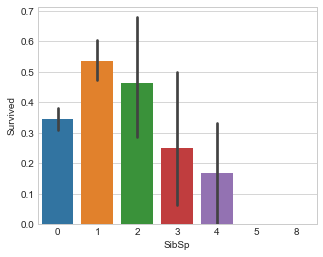

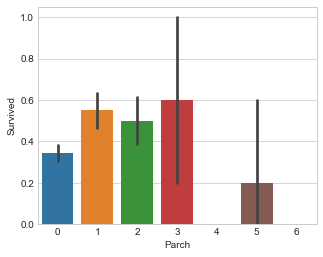

In [30]:
import seaborn as sb

for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sb.barplot(x=col, y='Survived', data=traindf, )

In [31]:
traindf[traindf['Parch'] > 3]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,14,0,3,0,39.0,1,5,347082,31.2750,NaN,S
26,26,1,3,1,38.0,1,5,347077,31.3875,NaN,S
168,168,0,3,1,45.0,1,4,347088,27.9000,NaN,S
361,361,0,3,0,40.0,1,4,347088,27.9000,NaN,S
439,439,0,1,0,64.0,1,4,19950,263.0000,C23 C25 C27,S
568,568,0,3,1,29.0,0,4,349909,21.0750,NaN,S
611,611,0,3,1,39.0,1,5,347082,31.2750,NaN,S
639,639,0,3,1,41.0,0,5,3101295,39.6875,NaN,S
679,679,0,3,1,43.0,1,6,CA 2144,46.9000,NaN,S


In [32]:
# A trend is observed where the more relatives you have, the less likely you are to survive (naturally)
# This trend is very similar in both Parch and SibSp, so it makes sense to combine these two into one feature to reduce 
# compexity when building our predictive model 

traindf['Relatives'] = traindf['Parch'] + traindf['SibSp']
traindf.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [33]:
traindf.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Sex', u'Age', u'Ticket',
       u'Fare', u'Cabin', u'Embarked', u'Relatives'],
      dtype='object')

In [34]:
##########--------------Ticket--------------##########             (No missing values)
# Does the work of a unique identifier, and has no correlation to survival, so it makes sense to drop it 

traindf.drop(['Ticket'], axis=1, inplace=True)

In [35]:
##########--------------Fare--------------##########             (No missing values)
# Fare directly correlates to the class of the ticket with which the passenger boarded with, which has already been established 
# as being an important predictive feature. 

traindf.drop(['Fare'], axis=1, inplace=True)

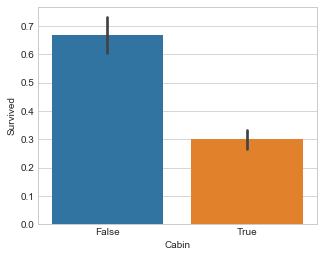

In [36]:
##########--------------Cabin--------------##########            
# We noticed a large amount of missing 'Cabin' values. Let's see if that has any correlation with Survival

sb.barplot(traindf.Cabin.isnull(), traindf.Survived)

# We can see that if there is a missing cabin value, you have a significantly lesser chance of survival than if you did

In [37]:
traindf.drop(['PassengerId'], axis=1, inplace=True)

In [38]:
# We can see that the survival rate is lower for those entries with a missing Cabin value, therefore, there is some correlation 
# between survival and the people that boarded without a cabi number (probably the lower class tickets )

# Since the actual value of the cabin is not as important as it being present or not, it makes sense to convert it into a
# numeric indicator (1 for being present, 0 for null)

traindf['Cabin_ind'] = np.where(traindf.Cabin.isnull(), 0, 1)
traindf.drop(['Cabin'], inplace=True, axis=1)

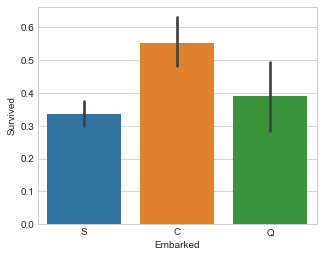

In [39]:
##########--------------Embarked--------------##########    
sb.barplot(traindf.Embarked, traindf.Survived)

In [40]:
# There is little to no correlation between the port embarked from and survival, so we may drop the feature
traindf.drop(['Embarked'], inplace=True, axis=1)

In [41]:
##############----------------------------Splitting the data into test/validation-------------------------------################
from sklearn.model_selection import train_test_split

testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# First, split the data into features and labels 
features = traindf.drop('Survived', axis=1)
labels = traindf.Survived

# This is a two step process where we first split the training data into training and test (60-40)
# and then split the test into validation and test (50-50)
# -----------training------------++validation++******test******

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
x_test.head()

,Pclass,Sex,Age,Relatives,Cabin_ind
PassengerId,,,,,
850,1,1,29.699118,1,1
332,1,0,45.500000,0,1
261,3,0,29.699118,0,0
317,2,1,24.000000,1,0
293,2,0,36.000000,0,1


In [43]:
# Final break up - 60-20-20 (train-validation-test). Now we make sure the break-up happened correctly
for dataset in [x_train, x_val, x_test]:
    print round( len(dataset) / float(len(labels)), 2 )

0.6
0.2
0.2


In [44]:
#############------------------5-Fold Cross-Validation--------------------################

# Goal: to estimate what the baseline performance of the model might look like (will take place only on the training set)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [45]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, x_train, y_train, cv=5)

In [46]:
scores

array([0.83333333, 0.80373832, 0.72897196, 0.75471698, 0.82075472])

In [47]:
scores.mean()

0.7883030623640745

In [48]:
# Now, we try to optimize the model to make it perform a little better by tuning hyperparameters using GridSearch
from sklearn.model_selection import GridSearchCV
# A wrapper around cross_val_score that allows us to run GridSearch within cross-validation 

In [49]:
# Print function for GridSearchCV to understand results a little better 
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std*2, 3), params))

In [50]:
rf = RandomForestClassifier()

# Note: RandomForest is a collection of decision trees, where the prediction of all the trees is combined into one 
# Each individual decision tree is fit on some subset of data and some subset of features 

# The two hyperparameter settings we want to tune are:
parameters = {
    'n_estimators' : [5, 50, 100], #how many decision trees do we wanna build within our randomForest
    'max_depth' : [2, 10, 20, None] # how deep each of the individual decision trees go 
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)

# This is going to take each parameter combination (12 total) and run 5-fold cross-validation on each of them (60 models total)

BEST PARAMS: {'n_estimators': 50, 'max_depth': 10}

0.792 (+/-0.12) for {'n_estimators': 5, 'max_depth': 2}
0.798 (+/-0.1) for {'n_estimators': 50, 'max_depth': 2}
0.796 (+/-0.123) for {'n_estimators': 100, 'max_depth': 2}
0.785 (+/-0.094) for {'n_estimators': 5, 'max_depth': 10}
0.809 (+/-0.093) for {'n_estimators': 50, 'max_depth': 10}
0.803 (+/-0.089) for {'n_estimators': 100, 'max_depth': 10}
0.777 (+/-0.049) for {'n_estimators': 5, 'max_depth': 20}
0.787 (+/-0.089) for {'n_estimators': 50, 'max_depth': 20}
0.785 (+/-0.073) for {'n_estimators': 100, 'max_depth': 20}
0.775 (+/-0.118) for {'n_estimators': 5, 'max_depth': None}
0.787 (+/-0.096) for {'n_estimators': 50, 'max_depth': None}
0.792 (+/-0.093) for {'n_estimators': 100, 'max_depth': None}


In [51]:
# Prev cross-val score = 79.01% accuracy 
# GridSearchCV score = 81.3% accuracy 

# From the above results above, we can infer that the closest cv score (79.4) was using the max_depth of None, which essentially
# means that there was no limitations on the DecisionTrees' depth when running cv by itself. This means that the respective model
# was leading to a little bit of overfitting (as compared to a max depth of 2, which is our best max depth)

# Usually you would test different algorithms other than RandomForestClassifier, but right now, lets just stick to one 

# Now, lets test our best three models (hyperparameter combinations) on our full training set (originally they were fit on only 
# 80% of the data at a time, because thats how 5-fold CV works) and THEN test it on our validation set
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [52]:
rf1 = RandomForestClassifier(n_estimators = 5, max_depth = 2)
rf1.fit(x_train, y_train)

rf2 = RandomForestClassifier(n_estimators = 50, max_depth = 10)
rf2.fit(x_train, y_train)

rf3 = RandomForestClassifier(n_estimators = 100, max_depth = 2)
rf3.fit(x_train, y_train)

# After running these, rf1, rf2 and rf3 will become fit models, which means we can use them to predict on unseen data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
# metrics on which we will evaluate our models are :-

# accuracy = (# predicted correctly) / (total # of examples)
# recall = (# predicted as surviving that actually survived) / (total # that actuall survived)
# precision = (# predicted as surviving that actually survived) / (total # predicted to survived)

for model in [rf1, rf2, rf3]:
    y_pred = model.predict(x_val)
    accuracy = round(accuracy_score(y_val, y_pred), 3)
    precision = round(precision_score(y_val, y_pred), 3)
    recall = round(recall_score(y_val, y_pred), 3)
    
    print('MAX DEPTH {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(model.max_depth,
                                                                       model.n_estimators,
                                                                       accuracy,
                                                                       precision,
                                                                       recall))

MAX DEPTH 2 / # OF EST: 5 -- A: 0.821 / P: 0.844 / R: 0.711
MAX DEPTH 10 / # OF EST: 50 -- A: 0.832 / P: 0.838 / R: 0.75
MAX DEPTH 2 / # OF EST: 100 -- A: 0.782 / P: 0.878 / R: 0.566


In [54]:
# Upon evaluation, we can determine that the second model is the best 
y_pred = rf2.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print('MAX DEPTH {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(model.max_depth,
                                                                       model.n_estimators,
                                                                       accuracy,
                                                                       precision,
                                                                       recall))

MAX DEPTH 2 / # OF EST: 100 -- A: 0.77 / P: 0.694 / R: 0.662


In [55]:
testdf.index = testdf.PassengerId
sex_num = {'male': 0, 'female': 1, np.nan: '2'}
testdf['Sex'] = testdf['Sex'].map(sex_num)
testdf.drop(['Name', 'Ticket', 'Fare', 'Embarked', 'PassengerId'], axis=1, inplace=True)
testdf['Relatives'] = testdf['Parch'] + testdf['SibSp']
testdf.drop(['Parch', 'SibSp'], axis=1, inplace=True)
testdf['Cabin_ind'] = np.where(testdf.Cabin.isnull(), 0, 1)
testdf.drop(['Cabin'], inplace=True, axis=1)

In [56]:
testdf.head()
testdf.Age.fillna(testdf.Age.mean(), inplace=True)

In [57]:
test_pred = rf3.predict(testdf)
test_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
pred = dataset = pd.DataFrame({'PassengerId': list(testdf.index), 
                               'Survived': list(test_pred)}, columns=['PassengerId', 'Survived'])

In [59]:
pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [60]:
pred.count()

PassengerId    418
Survived       418
dtype: int64

In [63]:
export_csv = pred.to_csv (r'C:\Users\harsh\Desktop\Summer Projects\TitanicKaggle\predictions.csv', index = None, header=True) 

In [64]:
train_csv = traindf.to_csv(r'C:\Users\harsh\Desktop\Summer Projects\TitanicKaggle\train_df.csv', index = None, header=True)
test_csv = testdf.to_csv(r'C:\Users\harsh\Desktop\Summer Projects\TitanicKaggle\test_df.csv', index = None, header=True)